<a href="https://colab.research.google.com/github/Kevin-Yau/CHL5230/blob/main/Datathon_4_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [48]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv('datathon4.csv')

In [49]:
# read dataset
ICU_df = pd.read_csv('datathon4.csv')
ICU_df.head()

# check dimension of the dataset
print(ICU_df.shape)

# list the columns of the dataframe
print(ICU_df.columns)

(91713, 186)
Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)


In [50]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [51]:
# Display summary statistics
print(df.describe())

        encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975

In [52]:
# Display summary statistics
df['heart_rate_apache'].describe()

count    90835.000000
mean        99.707932
std         30.870502
min         30.000000
25%         86.000000
50%        104.000000
75%        120.000000
max        178.000000
Name: heart_rate_apache, dtype: float64

In [53]:
# check missing value
print(ICU_df.isnull().sum())

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64


In [54]:
# checking the data types
ICU_df.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [55]:
ICU_df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [56]:
ICU_df['hospital_death'].mean()

0.08630183289173836

In [57]:
# Display unique values in 'ethnicity' column
print(ICU_df['ethnicity'].unique())

['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


In [58]:
#Drop Encounter ID
ICU_df= ICU_df.drop('encounter_id', axis=1)

In [59]:
# Display unique values in 'icu_admit_source' column
print(ICU_df['icu_admit_source'].unique())

['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]


In [60]:
ICU_df['gender'].replace({'F' : 1, 'M' : 0}, inplace=True)


In [61]:
#Display Gender
print(ICU_df['gender'].unique())

[ 0.  1. nan]


In [62]:


!pip install category_encoders

import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore')


from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



In [68]:
#Running one_hot encoding on all categorical columns
categorical_columns = ICU_df.select_dtypes(include='object').columns.tolist() #select all columns with 'object' data type

In [69]:
#create new dataframe with one-hot encoding for all categorical columns
ICU_df_encoded = pd.get_dummies(ICU_df, columns=categorical_columns)

ICU_df_encoded.head() #checking the head with the new hot-encoded library. Note new number of columns from 178 to 237

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,gender,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,25312,118,0,68.0,22.73,0,0.0,180.3,92,0.541667,...,1,0,0,0,0,0,0,0,0,0
1,59342,81,0,77.0,27.42,0,1.0,160.0,90,0.927778,...,0,0,0,0,0,0,1,0,0,0
2,50777,118,0,25.0,31.95,0,1.0,172.7,93,0.000694,...,0,0,0,1,0,0,0,0,0,0
3,46918,118,0,81.0,22.64,1,1.0,165.1,92,0.000694,...,1,0,0,0,0,0,0,0,0,0
4,34377,33,0,19.0,NaN,0,0.0,188.0,91,0.073611,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# list the columns of the hot encoded dataframe
print(ICU_df_encoded.columns)

Index(['patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi',
       'elective_surgery', 'gender', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_2_bodysystem_Cardiovascular',
       'apache_2_bodysystem_Gastrointestinal',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses'],
      dtype='object', length=236)


In [71]:
# checking the data types
ICU_df_encoded.dtypes

patient_id                                   int64
hospital_id                                  int64
hospital_death                               int64
age                                        float64
bmi                                        float64
                                            ...   
apache_2_bodysystem_Renal/Genitourinary      uint8
apache_2_bodysystem_Respiratory              uint8
apache_2_bodysystem_Trauma                   uint8
apache_2_bodysystem_Undefined Diagnoses      uint8
apache_2_bodysystem_Undefined diagnoses      uint8
Length: 236, dtype: object

In [72]:
# check missing value
print(ICU_df_encoded.isnull().sum())

patient_id                                    0
hospital_id                                   0
hospital_death                                0
age                                        4228
bmi                                        3429
                                           ... 
apache_2_bodysystem_Renal/Genitourinary       0
apache_2_bodysystem_Respiratory               0
apache_2_bodysystem_Trauma                    0
apache_2_bodysystem_Undefined Diagnoses       0
apache_2_bodysystem_Undefined diagnoses       0
Length: 236, dtype: int64


In [87]:
#dealing with missing values by replacing missing values in every columns with the median of that column
ICU_df_encoded.fillna(ICU_df_encoded.median(), inplace=True)

# check missing value
print(ICU_df_encoded.isnull().sum())

patient_id                                 0
hospital_id                                0
hospital_death                             0
age                                        0
bmi                                        0
                                          ..
apache_2_bodysystem_Renal/Genitourinary    0
apache_2_bodysystem_Respiratory            0
apache_2_bodysystem_Trauma                 0
apache_2_bodysystem_Undefined Diagnoses    0
apache_2_bodysystem_Undefined diagnoses    0
Length: 236, dtype: int64


**Logistic Regression**

In [93]:
# Import necessary libraries for feature selection and logistic regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [88]:
#creating a new dataframe for logistic regression analysis called ICU_LR which has one hot encoding, dropped column and imputation for missing numbers
ICU_LR = ICU_df_encoded.copy()

In [89]:
#checking that outcome is balanced
# Assuming 'target_column' is the name of the binary column you want to check
value_counts = ICU_LR['hospital_death'].value_counts()

# Display the counts of unique values
print(value_counts)

# Check if the data is balanced
is_balanced = abs(value_counts[0] - value_counts[1]) / len(ICU_LR['hospital_death']) < 0.2  # Adjust the threshold as needed

# Display the result
print(f"The binary column's data is balanced: {is_balanced}")

0    83798
1     7915
Name: hospital_death, dtype: int64
The binary column's data is balanced: False


In [85]:
#balancing the 'hospital_death' ie outcome with bootstrap upsampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = ICU_LR[ICU_LR['hospital_death'] == 0]
df_minority = ICU_LR[ICU_LR['hospital_death'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine majority class with upsampled minority class
ICU_LR_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Now 'ICU_LR_upsampled' contains the upsampled data



In [94]:
# Split the data into features and target variable
X = ICU_LR_upsampled.drop('hospital_death', axis=1)
y = ICU_LR_upsampled['hospital_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Initialize a Logistic Regression model
model = LogisticRegression()

# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC in this case)
    min_features_to_select=1,
)
rfecv.fit(X_train, y_train)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")


Optimal number of features: 62


In [97]:
# Which columns used and which wasn't used
rfecv.support_

#Show names of columns used
ICU_LR_upsampled.columns[list(rfecv.support_) + [True]]


Index(['hospital_death', 'bmi', 'icu_id', 'weight', 'apache_3j_diagnosis',
       'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'hematocrit_apache', 'urineoutput_apache',
       'd1_diasbp_noninvasive_min', 'd1_mbp_max', 'd1_spo2_max', 'd1_temp_max',
       'h1_resprate_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min',
       'd1_bilirubin_max', 'd1_bun_max', 'd1_hco3_min', 'd1_hematocrit_min',
       'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_wbc_max',
       'd1_wbc_min', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_hematocrit_max',
       'h1_hematocrit_min', 'h1_inr_max', 'h1_lactate_max', 'h1_sodium_max',
       'h1_pao2fio2ratio_min', 'apache_4a_hospital_death_prob', 'cirrhosis',
       'hepatic_failure', 'lymphoma',
       'hospital_admit_source_Chest Pain Center',
       'hospital_admit_source_Emergency Department',
       'hospital_admit_source_Observation', 'hospital_admit_source_Other',
       'hospital_admit_source_Step-Down Un

In [98]:
# Features ranking low is better
rfecv.ranking_

array([163, 154,   1,  99,   1, 114,  27, 140,   1, 174,  28,   1, 110,
        83,   1, 122,  19,  32,  48,   1,   1,   1,   1,   8, 129,  88,
       123,   1,  69,  46,  52,  98, 148,   3, 147,   2, 115,   1,  10,
        72,  42,  61, 146, 132, 116,   1, 130, 128,  40,  96,   1, 134,
        81,  68,  15, 161,   1, 101, 105,  90,   6, 102,  91, 149,   1,
        97,  14,  33,  71,  70, 107,  67,  62, 109,  78,  63,   9, 106,
         4,  60,   1, 133,  38,  66, 113, 143, 104,  76, 100,  20,   7,
         1,   1,   1,   1,  57,   1,  56,  17,  93,  41, 103,  31,  37,
        43,   1,  11,  49,  79,   1,   1,   1,   1,  92,  77,  73,  13,
        12,  21,  22,   1,   1,  18,   1,   1,  58, 112,  51,  55, 150,
       151, 111, 118,  82,  65, 160, 159,  23,   1,   1,   1,  24,   1,
       139,  95, 158, 153,   5,   1, 131, 126,  16,  45, 152,  85,  50,
        39,  44, 108,  47,  75, 156, 157,  25,  26,  59,  54,   1,   1,
       164,  30,   1,  36,   1, 121, 137,   1, 135, 166, 120,  9

In [99]:
#Show names of columns used
ICU_LR_upsampled.columns[list(rfecv.ranking_)]

Index(['h1_arterial_ph_min', 'd1_arterial_ph_max', 'hospital_id',
       'd1_calcium_min', 'hospital_id', 'd1_platelets_max',
       'hematocrit_apache', 'h1_inr_max', 'hospital_id', 'immunosuppression',
       ...
       'hospital_id', 'hospital_id', 'h1_inr_min', 'hospital_id',
       'hospital_id', 'h1_sysbp_min', 'hospital_id', 'h1_arterial_po2_min',
       'apache_4a_icu_death_prob', 'hospital_id'],
      dtype='object', length=235)

In [100]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

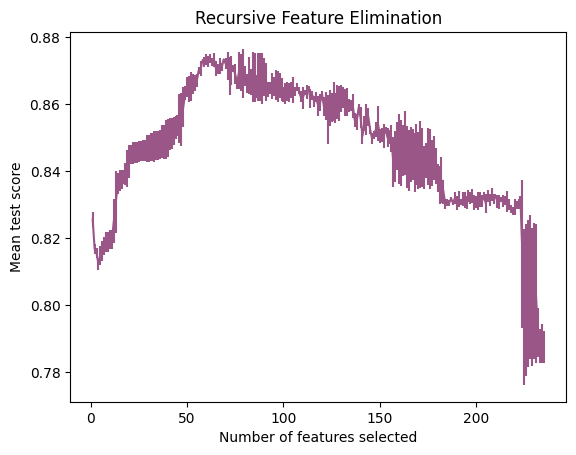

In [101]:
# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()


In [102]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)




In [107]:
selected_columns = X_train.columns[rfecv.support_]

# Select only the features that were chosen by RFECV
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

IndexError: ignored

In [104]:
# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)



======== Training Set ==========
AUC :  0.797274915498634
Accuracy :  0.7970628598705212
Confusion Matrix:
[[54362 14497]
 [12712 52505]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     68859
           1       0.78      0.81      0.79     65217

    accuracy                           0.80    134076
   macro avg       0.80      0.80      0.80    134076
weighted avg       0.80      0.80      0.80    134076

======== Test Set ==========
AUC :  0.7956509935885241
Accuracy :  0.7954355608591885
Confusion Matrix:
[[13525  3658]
 [ 3199 13138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     17183
           1       0.78      0.80      0.79     16337

    accuracy                           0.80     33520
   macro avg       0.80      0.80      0.80     33520
weighted avg       0.80      0.80      0.80     33520



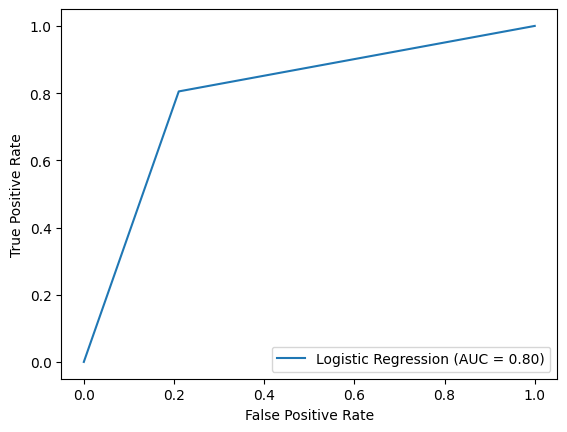

In [105]:
# Plot the ROC curve for the training set
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

In [109]:
# Get summary report
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.03130278 -0.40122047  0.05048309 -0.10159816 -0.33767746  0.18816485
  -0.1967235  -0.19346085  0.17315213  0.26801404  0.7446327   0.01261158
  -0.01274086 -0.02040232 -0.16633137  0.03161908 -0.11289127 -0.1637276
   0.05649008  0.04135586  0.01394693 -0.06737751  0.02466784  0.02900502
   0.06417978  0.28747139  0.02480119 -0.01830003  0.02541329  0.0252353
   0.01913552  0.02466784  0.02900502 -0.08686555  0.03955599  0.32621946
   0.19444013 -0.20275512  0.15281881  0.1872266   0.11818735  0.14012098
  -0.23479281  0.07981653 -0.0185824   0.18739696 -0.36724733  0.12145358
  -0.16821054 -0.10890814  0.14261662 -0.0989821  -0.0631869  -0.25297337
   0.22347463  0.16228869  0.12789313 -0.0631869  -0.25297337  0.22347463
   0.16228869 -0.17781576]]
Intercept: [0.01678869]


In [110]:
import statsmodels.api as sm

# Select only the features that were chosen by RFECV
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

# Add a constant to the features
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.433520
         Iterations 8


LinAlgError: ignored

In [122]:
# Select only the features
selected_columns =['hospital_death', 'bmi', 'icu_id', 'weight', 'apache_3j_diagnosis',
       'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'hematocrit_apache', 'urineoutput_apache',
       'd1_diasbp_noninvasive_min', 'd1_mbp_max', 'd1_spo2_max', 'd1_temp_max',
       'h1_resprate_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min',
       'd1_bilirubin_max', 'd1_bun_max', 'd1_hco3_min', 'd1_hematocrit_min',
       'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_wbc_max',
       'd1_wbc_min', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_hematocrit_max',
       'h1_hematocrit_min', 'h1_inr_max', 'h1_lactate_max', 'h1_sodium_max',
       'h1_pao2fio2ratio_min', 'apache_4a_hospital_death_prob', 'cirrhosis',
       'hepatic_failure', 'lymphoma',
       'hospital_admit_source_Chest Pain Center',
       'hospital_admit_source_Emergency Department',
       'hospital_admit_source_Observation', 'hospital_admit_source_Other',
       'hospital_admit_source_Step-Down Unit (SDU)',
       'icu_admit_source_Accident & Emergency', 'icu_admit_source_Floor',
       'icu_admit_source_Operating Room / Recovery', 'icu_type_CCU-CTICU',
       'icu_type_MICU', 'icu_type_Med-Surg ICU', 'icu_type_SICU',
       'apache_3j_bodysystem_Cardiovascular',
       'apache_3j_bodysystem_Hematological',
       'apache_3j_bodysystem_Musculoskeletal/Skin',
       'apache_3j_bodysystem_Neurological', 'apache_3j_bodysystem_Trauma',
       'apache_2_bodysystem_Cardiovascular',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses']

X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

# Add a constant to the features
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary
print(result.summary())

KeyError: ignored

In [123]:
print(X_train.columns)

Index(['const', 'age', 'elective_surgery', 'pre_icu_los_days',
       'albumin_apache', 'apache_post_operative', 'fio2_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'intubated_apache', 'ventilated_apache', 'd1_heartrate_max',
       'd1_mbp_min', 'd1_spo2_min', 'd1_temp_min', 'h1_resprate_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_min', 'd1_hemaglobin_max', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_wbc_min',
       'h1_albumin_max', 'h1_bilirubin_max', 'h1_bilirubin_min',
       'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_min',
       'h1_sodium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'diabetes_mellitus', 'immunosuppression',
       'solid_tumor_with_metastasis', 'hospital_admit_source_Direct Admit',
       'hospital_admit_source_Floor', 'hospital_admit_source_Operating Room',
       'hospital_admit_source_